<center>

# **MICROPROYECTO 2  - CLUSTERING:** Censo USA Oeste.
---
Introducción a la Inteligencia Artificial, Código: 3010476

Inteligencia Artificial, Código: 3007855

---

**Profesor:**

Demetrio Arturo Ovalle Carranza

---

**Monitores:**

Daniel Metaute Medina

Felipe Muñoz Echeverri

---

**Estudiantes:**

Carlos Jose Quijano Valencia

Juan David Cortés Amador

Jose Fernando López Ramírez

---
</center>


# **Objetivo**: Analizar el Censo en USA de ciudades y estados más al oeste de EEUU (10 estados).

In [31]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from tabulate import tabulate 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

<p>
<h3>1) Pre-procesamiento del archivo .csv </h3>
Para este proyecto, se realizaron varios pasos de pre-procesamiento en el archivo census.csv con el fin de preparar los datos para el análisis de clustering. Primero, se mezclaron los datos de forma aleatoria para evitar cualquier sesgo en el orden de los registros y luego se filtraron los datos para trabajar únicamente con los estados más al oeste de Estados Unidos, como Hawaii, Washington, Oregon, Idaho, California, Nevada, Utah, Arizona, Colorado y Nuevo México.
</p>

In [32]:
dataset = "census.csv"
data = pd.read_csv(dataset)

In [33]:
censo_df = data.sample(frac=1).reset_index(drop=True)

censo_df = data.iloc[0:3194]

censo_df.tail()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961
3192,50,4,8,56,45,Wyoming,Weston County,7208,7208,7181,...,-11.752361,-8.040059,12.372583,1.533635,6.935294,-12.032179,-8.040059,12.372583,1.533635,6.935294


In [34]:
censo_df.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMI

In [35]:
# Definir estados del oeste 
estados_oeste = [
    'Hawaii', 'Washington', 'Oregon', 'Idaho', 'California', 
    'Nevada', 'Utah', 'Arizona', 'Colorado', 'New Mexico'
]

# Seleccionar columnas relevantes para el análisis
columnas_seleccionadas = [
    'STNAME', 
    'CTYNAME',
    # Población estimada para tres años
    'POPESTIMATE2011',
    'POPESTIMATE2013',
    'POPESTIMATE2015',
    # Tasas de nacimiento para tres años
    'RBIRTH2011',
    'RBIRTH2013',
    'RBIRTH2015',
    # Tasas de muerte para tres años
    'RDEATH2011',
    'RDEATH2013',
    'RDEATH2015'
]

In [36]:
df_west = censo_df[columnas_seleccionadas]
df_west = df_west[df_west['STNAME'].isin(estados_oeste)]

In [37]:
# Crear nuevas características
# Cambios porcentuales en población
df_west['pop_change_2011_2013'] = (
    (df_west['POPESTIMATE2013'] - df_west['POPESTIMATE2011']) / 
    df_west['POPESTIMATE2011'] * 100
)
df_west['pop_change_2013_2015'] = (
    (df_west['POPESTIMATE2015'] - df_west['POPESTIMATE2013']) / 
    df_west['POPESTIMATE2013'] * 100
)

# Promedios de tasas de nacimiento y muerte
df_west['avg_birth_rate'] = df_west[['RBIRTH2011', 'RBIRTH2013', 'RBIRTH2015']].mean(axis=1)
df_west['avg_death_rate'] = df_west[['RDEATH2011', 'RDEATH2013', 'RDEATH2015']].mean(axis=1)

In [38]:
df_west.head()

,STNAME,CTYNAME,POPESTIMATE2011,POPESTIMATE2013,POPESTIMATE2015,RBIRTH2011,RBIRTH2013,RBIRTH2015,RDEATH2011,RDEATH2013,RDEATH2015,pop_change_2011_2013,pop_change_2013_2015,avg_birth_rate,avg_death_rate
98,Arizona,Arizona,6468732,6630799,6828065,13.373364,13.061681,12.891640,7.478795,7.674722,7.853300,2.505391,2.974996,13.108895,7.668939
99,Arizona,Apache County,72387,71953,71474,14.914709,13.733704,15.195490,8.130250,7.301638,8.958223,-0.599555,-0.665712,14.614634,8.130037
100,Arizona,Cochise County,132996,129605,126427,13.390986,12.482170,12.453300,9.184117,9.713453,9.481848,-2.549701,-2.452066,12.775485,9.459806
101,Arizona,Coconino County,134182,136612,139097,13.407339,12.348215,12.221122,5.356983,5.436736,5.868451,1.810973,1.819020,12.658892,5.554057
102,Arizona,Gila County,53473,53025,53159,12.297112,11.409067,11.665318,12.876459,12.615976,14.619278,-0.837806,0.252711,11.790499,13.370571


In [39]:
cluster_df = df_west[[
    'pop_change_2011_2013',
    'pop_change_2013_2015',
    'avg_birth_rate',
    'avg_death_rate'
]]

In [40]:
cluster_df.head()

,pop_change_2011_2013,pop_change_2013_2015,avg_birth_rate,avg_death_rate
98,2.505391,2.974996,13.108895,7.668939
99,-0.599555,-0.665712,14.614634,8.130037
100,-2.549701,-2.452066,12.775485,9.459806
101,1.810973,1.819020,12.658892,5.554057
102,-0.837806,0.252711,11.790499,13.370571


<p> Se realizaron numerosas pruebas con muchas de las variables y se llegó a qué los cambios porcentuales en la población del 2011 al 2013, cambios porcentuales del 2013 al 2015, las tasas de nacimiento y tasas de muerte de los años 2011, 2013, 2015 por sugerencia del profesor.Estas variables se eligieron porque permiten segmentar los datos de manera significativa, ya que reflejan dinámicas demográficas importantes. Finalmente, se normalizaron los datos para que todas las variables tuvieran la misma escala, lo cual es crucial para que los algoritmos de clustering funcionen correctamente.

In [41]:
# funcion para graficar la correlacion y la distribucion entre variables numericas
def plot_pares(df):
    import matplotlib.pyplot as plt
    import seaborn as sb
    import numpy as np

    num_cols = df.select_dtypes(include=np.number).columns

    # matriz de correlaciones
    grid = sb.pairplot(
        df,
        height=2,
        vars=num_cols,
        kind='scatter'
    )

    def pintarCorr(x, y, **kwargs):
        plt.gca().get_children()[0].remove()

        # calcular correlacion de pearson
        corr = round(np.corrcoef(x, y)[0,1], 2)
        plt.gca().text((max(x) + min(x))/2, (max(y) + min(y))/2, s=str(corr), fontsize=12)


    # pintar la correlacion en la parte inferior de la diagonal
    grid.map_lower(pintarCorr)

    plt.show()

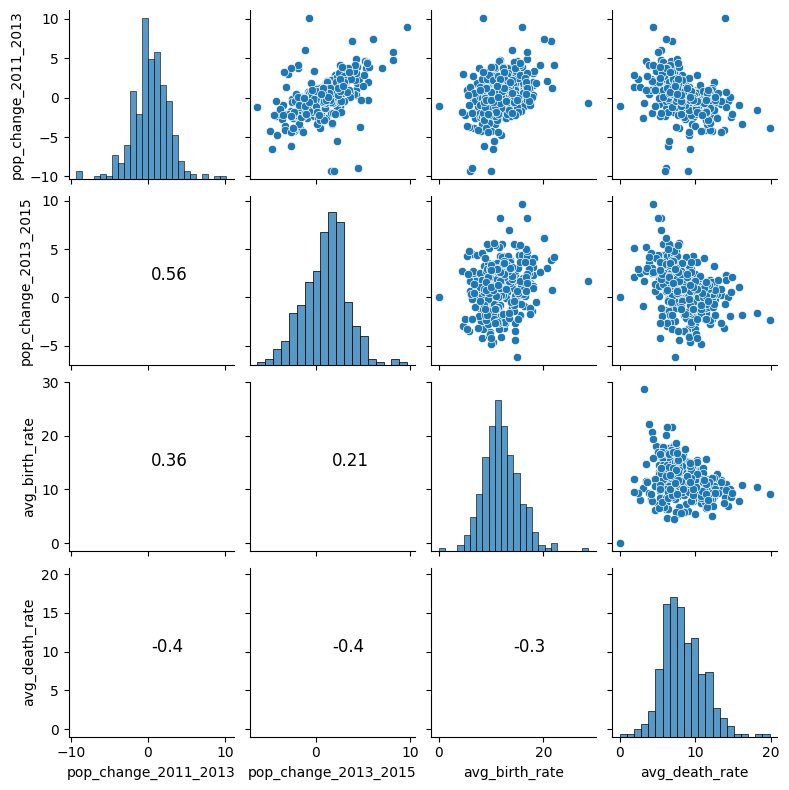

In [42]:
plot_pares(cluster_df) 

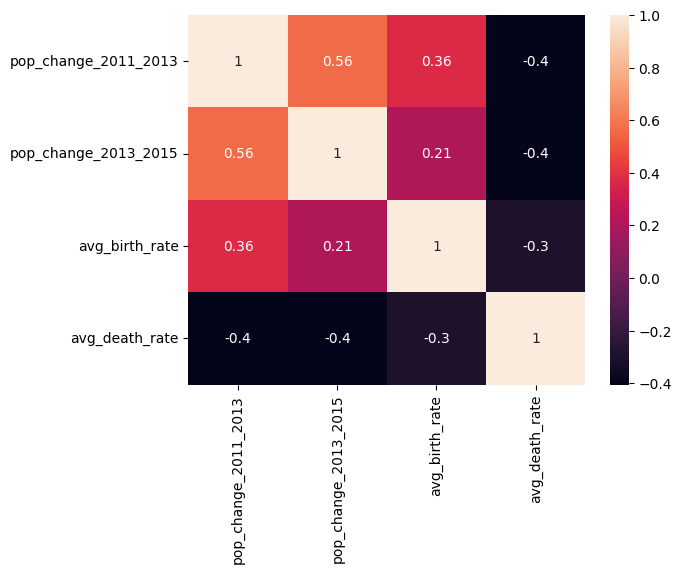

In [43]:
import seaborn as sns

sns.heatmap(cluster_df.corr(numeric_only=True), annot=True)

plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(cluster_df[[
    'pop_change_2011_2013',
    'pop_change_2013_2015',
    'avg_birth_rate',
    'avg_death_rate']])

scaled_data

array([[0.6069492 , 0.5768488 , 0.45834223, 0.3867668 ],
       [0.4474805 , 0.34755652, 0.51098923, 0.4100213 ],
       [0.34732184, 0.23505174, 0.44668482, 0.4770854 ],
       ...,
       [0.55235299, 0.57062631, 0.38831704, 0.36865076],
       [0.67946014, 0.5680091 , 0.35103835, 0.27183099],
       [0.49945725, 0.42737177, 0.58390417, 0.38365839]], shape=(350, 4))

<h3>2) Técnicas para establecer el número de clústeres</h3>
<p>Para determinar el número óptimo de clústeres, se utilizaron tres técnicas principales:<p>
<p>Método del Codo: Se graficó la suma de los errores cuadrados (SSE) en función del número de clústeres. El punto donde la curva comienza a aplanarse (el "codo") indica el número óptimo de clústeres. En este caso, se observó que el codo se encuentra alrededor de 2 clústeres.<p>

In [45]:
def elbow_curve(data, maxClusters = 15):
  from sklearn.cluster import KMeans

  # rango de valores del parámetro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  inertias = []
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k, n_init="auto")
    kmeanModel.fit(data)
    inertias.append(kmeanModel.inertia_)

  # Grafico de los resultados obtenidos para cada valor del rango
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('Curva de codo')
  plt.show()

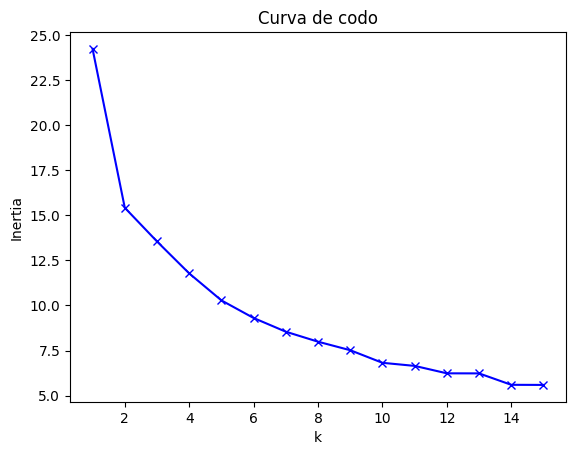

In [46]:
elbow_curve(scaled_data)

<p>Estadístico de Gap: Este método compara la dispersión de los datos con la dispersión esperada en una distribución aleatoria. El número óptimo de clústeres es aquel donde el estadístico de gap es máximo. En nuestro análisis, el estadístico de gap también sugirió 2 clústeres.</p>

In [47]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def GAPstatistic(data, maxClusters=15, nrefs=3):
    from sklearn.cluster import KMeans

    gaps = np.zeros((maxClusters,))
    results = {'clusterCount':[], 'gap':[]}
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        # guardara los resultados de dispersión de cada distribución simulada
        refDisps = np.zeros(nrefs)

        # Genera las muestras aleatorias indicadas con nrefs y ejecuta k-means
        # en cada bucle obteniendo los resultados de dispersión (inercia)
        # para cada conjunto generado.
        for i in range(nrefs):

            # Crea nuevo conjunto aleatorio de referencia
            # Se puede usar una semilla para tener reproducibilidad
            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)

            # se ajusta el modelo al conjunto de referencia
            km = KMeans(k, n_init="auto")
            km.fit(randomReference)
            # se guarda la dispersión obtenida
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Se ajusta el modelo a los datos originales y se guarda su inercia
        km = KMeans(k, n_init="auto")
        km.fit(data)

        origDisp = km.inertia_

        # Calcula el estadístico de gap para k clusters usando el promedio de
        # las dispersiones de los datos simulados y la dispersión de los datos originales.
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Guarda el estadístico de gap obtenido en este bucle.
        gaps[gap_index] = gap

        results['clusterCount'].append(k)
        results['gap'].append(gap)

    # Selecciona el "primer máximo" de los estadísticos obtenidos y devuelve
    # su respectivo número de clusters
    optK = 0
    for i in range(0, len(gaps)-1):
      if gaps[i+1] <= gaps[i]:
        optK = i+1
        break

    plt.figure()

    plt.plot(results['clusterCount'], results['gap'], linewidth=3, marker='o')
    plt.axvline(x=optK, color='r', linestyle='--')

    plt.xlabel('Cantidad de clusters')
    plt.ylabel('Gap')
    plt.title('Estadístico de gap')
    plt.show()

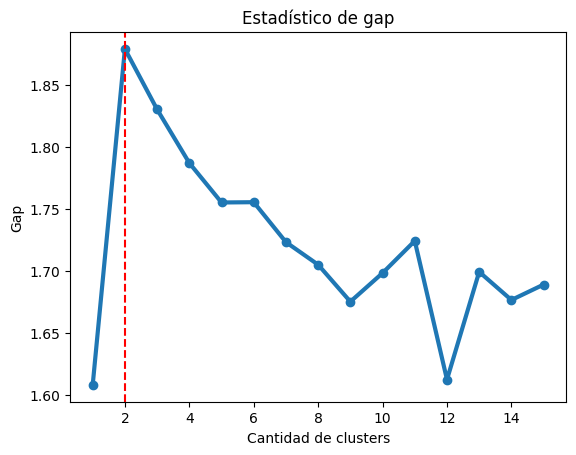

In [48]:
GAPstatistic(scaled_data)

<p>Análisis de la Silueta: Este método mide cuán similar es un objeto a su propio clúster en comparación con otros clústeres. Un valor de silueta cercano a 1 indica una buena separación entre clústeres. El análisis de silueta confirmó que 2 clústeres es la opción más adecuada.</p>

In [49]:
def coef_silueta(data, maxClusters=6):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.cm as cm

    for n_clusters in range(2, maxClusters+1):
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(19, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim(-0.1, 1)
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim(0, len(data) + (n_clusters + 1) * 10)

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init="auto")
        cluster_labels = clusterer.fit_predict(data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(data, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.32740470981692155
For n_clusters = 3 The average silhouette_score is : 0.31131317181209045
For n_clusters = 4 The average silhouette_score is : 0.25031277766118276
For n_clusters = 5 The average silhouette_score is : 0.2426898985720634
For n_clusters = 6 The average silhouette_score is : 0.25507564852841275
For n_clusters = 7 The average silhouette_score is : 0.2264418998403069


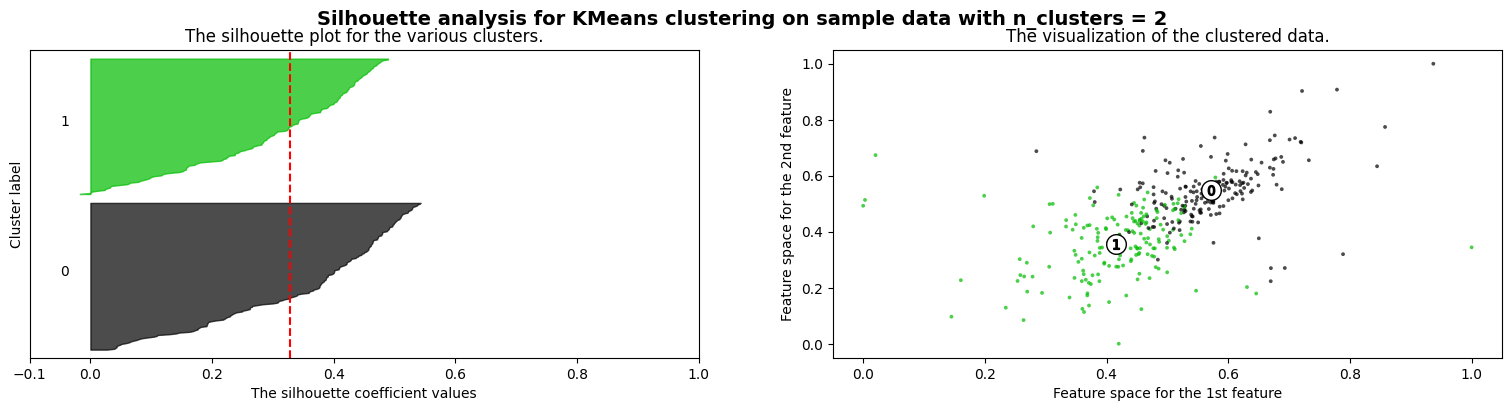

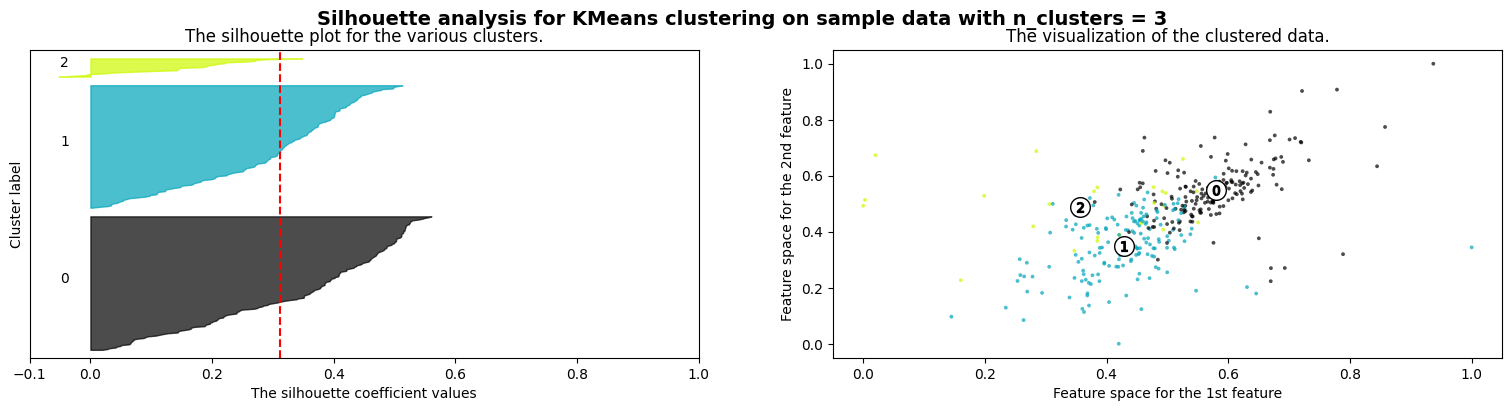

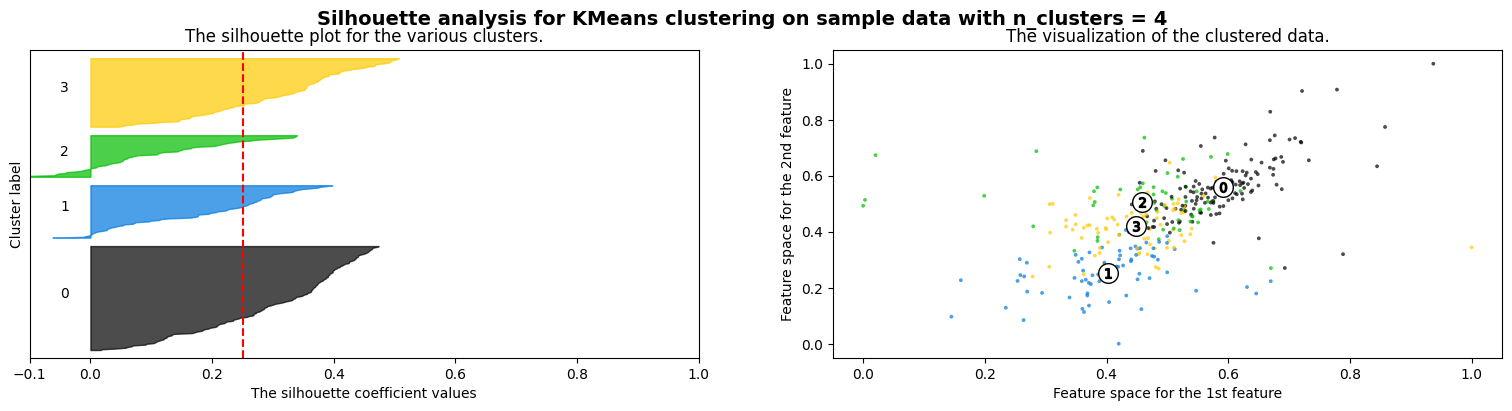

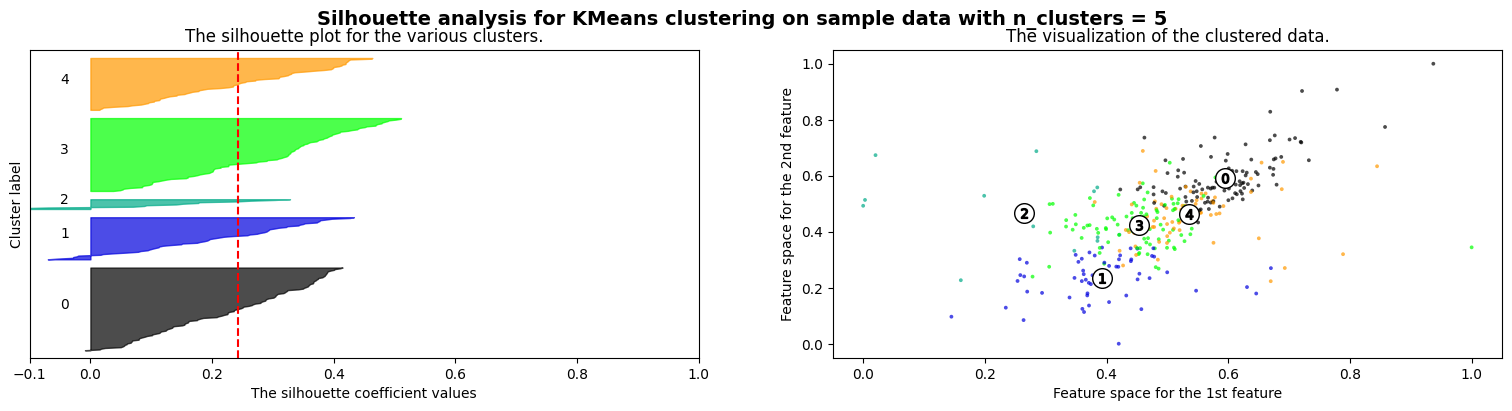

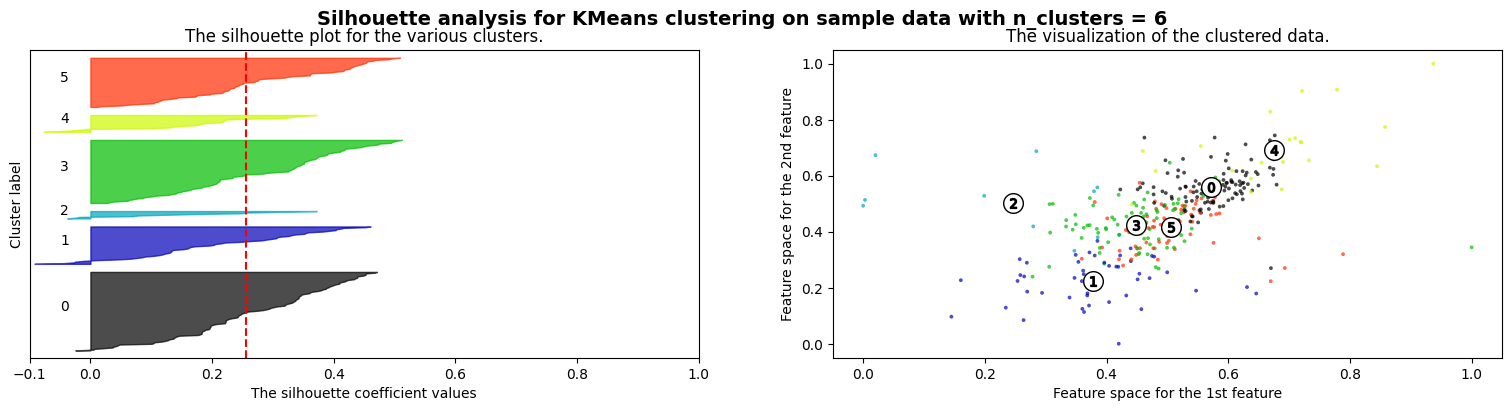

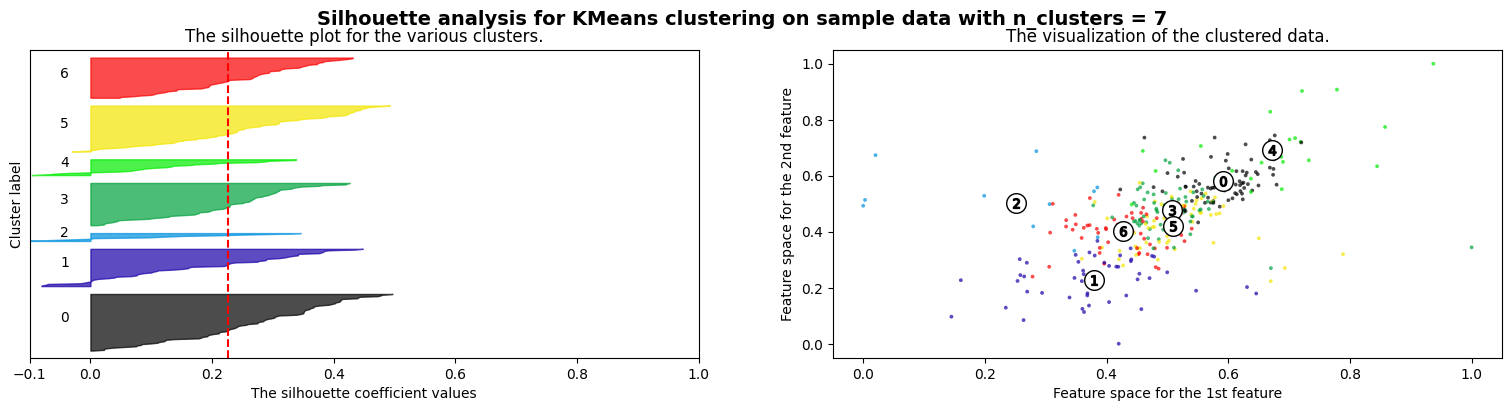

In [50]:
coef_silueta(scaled_data, 7)

<h3>3) Agrupamiento jerárquico y dendrograma</h3>
<p>Se realizó un agrupamiento jerárquico utilizando el método de Ward, que minimiza la varianza dentro de los clústeres. Este enfoque permitió visualizar la estructura de los datos a través de un dendrograma. En el dendrograma, se observó que los datos se agrupan naturalmente en 2 clústeres, lo que coincide con los resultados obtenidos en los métodos anteriores. </p>
<p>En este caso, una distancia de 2 a 5 podría ser razonable para muchos conjuntos de datos: en este caso se estabeció una distancia de 2.3. </p>

In [51]:
def Dendograma(data, lines=[]):
    import scipy.cluster.hierarchy as shc

    plt.figure(figsize=(15, 7))
    plt.title("Dendrograma")
    dend = shc.dendrogram(shc.linkage(data, method='ward'),truncate_mode='level',p=3)

    for l in lines:
        plt.axhline(y=l, color='b', linestyle='-.')

    plt.ylabel('Distancia euclidiana')
    plt.xlabel('puntos de datos')
    plt.show()

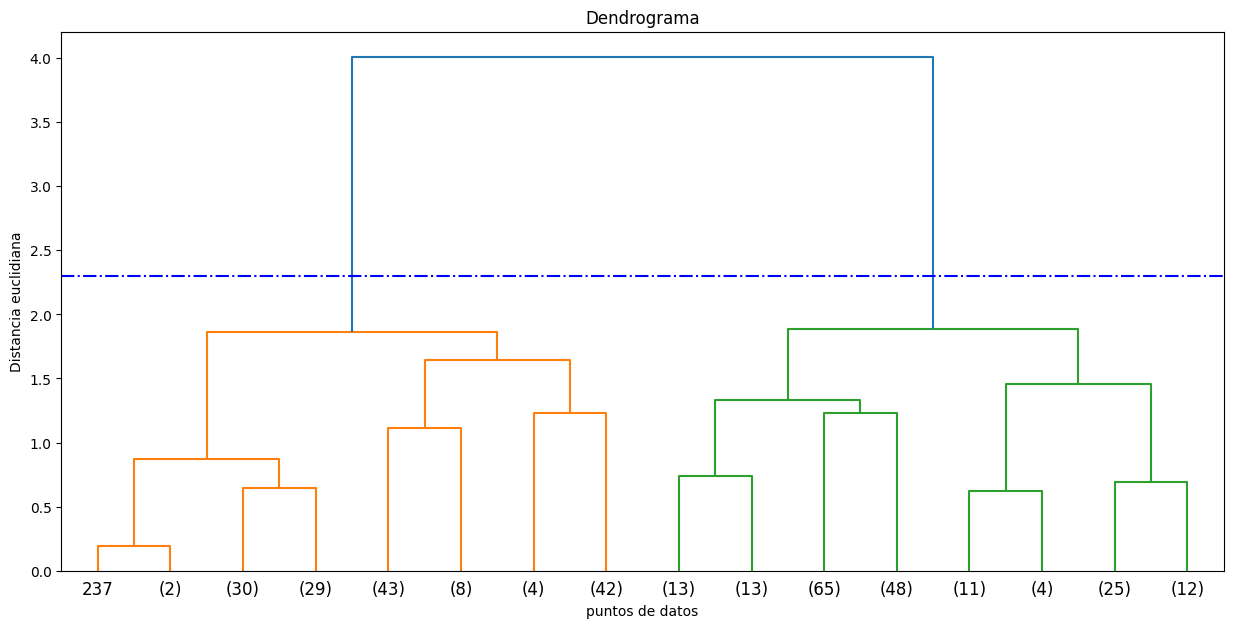

In [52]:
Dendograma(scaled_data, [2.3])

<h3>4) Características representativas de cada clúster</h3>
<p>Dado todo el analisis realizado se llego al uso de 2 clusters, usamos tanto agglomerativeClustering y K-Means</p>


In [53]:
from sklearn.cluster import AgglomerativeClustering

K = 2

aggClusters = AgglomerativeClustering(n_clusters=K).fit(scaled_data)

aggClusters.labels_

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [54]:
from sklearn.cluster import KMeans

kmeansClusters = KMeans(n_clusters=K).fit(scaled_data)


<p>Realizamos una comparación visual entre los resultados de dos algoritmos de clustering: K-Means y Agglomerative Clustering.</p>

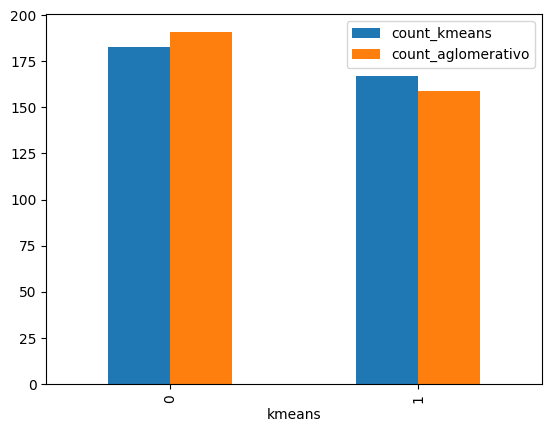

In [55]:
kmean = pd.Series(kmeansClusters.labels_, name="kmeans").value_counts()
aglomerativo = pd.Series(aggClusters.labels_, name="aglomerativo").value_counts()

comp_metodos = pd.merge(
    kmean, 
    aglomerativo, 
    left_index=True, 
    right_index=True, 
    suffixes=('_kmeans', '_aglomerativo')
)

comp_metodos.plot.bar()
plt.show()


<p>Al final no hay cambios sustanciales en usar uno u otro algoritmo, optamos por usar Kmeans en este caso. Hacemos la grafica solo teniendo en cuenta 3 de las 4 variables utilizados para obtener una mejor interpretación grafica de la caracterización.</p>

In [72]:
print("Forma de los datos:")
print("cluster_df shape:", cluster_df.shape)
print("df_west shape:", df_west.shape)
print("kmeansClusters.labels_ shape:", kmeansClusters.labels_.shape)

visualization_df = pd.DataFrame({
    'pop_change_2013_2015': cluster_df['pop_change_2013_2015'],
    'avg_birth_rate': cluster_df['avg_birth_rate'],
    'avg_death_rate': cluster_df['avg_death_rate'],
    'cluster': kmeansClusters.labels_,
    'STNAME': df_west['STNAME'].values,
    'CTYNAME': df_west['CTYNAME'].values
})

print("\nNuevo DataFrame:")
print(visualization_df.head())
print("\nColumnas:", visualization_df.columns.tolist())

fig = px.scatter_3d(
    visualization_df,
    x="pop_change_2013_2015",
    y="avg_birth_rate",
    z="avg_death_rate",
    color="cluster",
    hover_data=['STNAME', 'CTYNAME'],
    labels={
        'pop_change_2013_2015': 'Cambio Poblacional 2013-2015 (%)',
        'avg_birth_rate': 'Tasa de Nacimiento Promedio',
        'avg_death_rate': 'Tasa de Muerte Promedio',
        'cluster': 'Cluster'
    },
    title='Clusters por Estado y Condado'
)

fig.update_layout(
    scene = dict(
        xaxis_title='Cambio Poblacional 2013-2015 (%)',
        yaxis_title='Tasa de Nacimiento Promedio',
        zaxis_title='Tasa de Muerte Promedio'
    ),
    legend_title_text='Cluster'
)

fig.show()

Forma de los datos:
cluster_df shape: (350, 5)
df_west shape: (350, 15)
kmeansClusters.labels_ shape: (350,)

Nuevo DataFrame:
     pop_change_2013_2015  avg_birth_rate  avg_death_rate  cluster   STNAME  \
98               2.974996       13.108895        7.668939        0  Arizona   
99              -0.665712       14.614634        8.130037        1  Arizona   
100             -2.452066       12.775485        9.459806        1  Arizona   
101              1.819020       12.658892        5.554057        0  Arizona   
102              0.252711       11.790499       13.370571        1  Arizona   

             CTYNAME  
98           Arizona  
99     Apache County  
100   Cochise County  
101  Coconino County  
102      Gila County  

Columnas: ['pop_change_2013_2015', 'avg_birth_rate', 'avg_death_rate', 'cluster', 'STNAME', 'CTYNAME']


<p>La gráfica permite visualizar claramente las diferencias entre los clusters en términos de cambio poblacional, tasas de natalidad y tasas de mortalidad.</p>

C:\Users\macui\AppData\Local\Temp\ipykernel_16648\1008627809.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1500x1500 with 0 Axes>

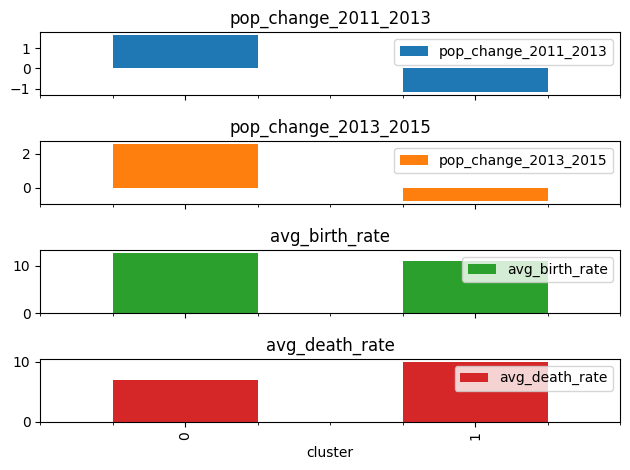

In [57]:
cluster_df['cluster'] = aggClusters.labels_

census_numeric = cluster_df.select_dtypes(include=[np.number])
plt.figure(figsize=(15,15))
census_numeric.groupby('cluster').mean().plot.bar(subplots=True)
plt.tight_layout()
plt.show()

In [77]:
def get_enhanced_cluster_summary(df_west, cluster_labels):
    temp_df = df_west.copy()
    temp_df['cluster'] = cluster_labels
    
    for cluster_num in sorted(set(cluster_labels)):
        cluster_data = temp_df[temp_df['cluster'] == cluster_num]
        
        cluster_means = cluster_data[[
            'pop_change_2011_2013',
            'pop_change_2013_2015',
            'avg_birth_rate',
            'avg_death_rate'
        ]].mean()
        
        print(f"\n=== Cluster {cluster_num} ===")
        print("\nCaracterísticas principales:")
        print(f"- Cambio poblacional promedio (2011-2013): {cluster_means['pop_change_2011_2013']:.2f}%")
        print(f"- Tasa de nacimiento promedio (2013-2015): {cluster_means['pop_change_2013_2015']:.2f}%")
        print(f"- Tasa de nacimiento promedio: {cluster_means['avg_birth_rate']:.2f}")
        print(f"- Tasa de muerte promedio: {cluster_means['avg_death_rate']:.2f}")
        
        print("\nEstados y número de condados:")
        state_counts = cluster_data['STNAME'].value_counts()
        for state, count in state_counts.items():
            print(f"- {state}: {count} condados")
        
        print("\nEjemplos de condados representativos:")
        for state in cluster_data['STNAME'].unique():
            counties = cluster_data[cluster_data['STNAME'] == state]['CTYNAME'].head(3).tolist()
            if counties:
                print(f"- {state}: {', '.join(counties)}")

get_enhanced_cluster_summary(df_west, kmeansClusters.labels_)



=== Cluster 0 ===

Características principales:
- Cambio poblacional promedio (2011-2013): 1.88%
- Tasa de nacimiento promedio (2013-2015): 2.51%
- Tasa de nacimiento promedio: 13.13
- Tasa de muerte promedio: 6.72

Estados y número de condados:
- California: 37 condados
- Colorado: 34 condados
- Idaho: 23 condados
- Washington: 22 condados
- Utah: 21 condados
- Oregon: 15 condados
- Arizona: 9 condados
- Nevada: 8 condados
- New Mexico: 8 condados
- Hawaii: 6 condados

Ejemplos de condados representativos:
- Arizona: Arizona, Coconino County, Graham County
- California: California, Alameda County, Colusa County
- Colorado: Colorado, Adams County, Alamosa County
- Hawaii: Hawaii, Hawaii County, Honolulu County
- Idaho: Idaho, Ada County, Bannock County
- Nevada: Nevada, Clark County, Elko County
- New Mexico: Bernalillo County, Curry County, Doña Ana County
- Oregon: Oregon, Benton County, Clackamas County
- Utah: Utah, Box Elder County, Cache County
- Washington: Washington, Adams Co

<h3>5) A partir del análisis de resultados describa 5 tendencias encontradas en los datos, justifique su respuesta.</h3>
<p>Crecimiento poblacional en el Cluster 0 vs. declive en el Cluster 1.

Mayor tasa de natalidad en el Cluster 0.

Menor tasa de mortalidad en el Cluster 0.

Distribución geográfica diferenciada: Cluster 0 en áreas más dinámicas, Cluster 1 en áreas rurales.

Condados urbanos en el Cluster 0 vs. condados rurales en el Cluster 1.</p>
<p>Estas tendencias sugieren que los clusters están separados principalmente por dinámica poblacional (crecimiento vs. declive) y características socioeconómicas (áreas urbanas vs. rurales). El Cluster 0 representa condados con mayor crecimiento, tasas de natalidad más altas y menor mortalidad, mientras que el Cluster 1 representa condados con declive poblacional, tasas de natalidad más bajas y mayor mortalidad. Estas diferencias podrían ser útiles para diseñar políticas públicas específicas para cada tipo de condado.</p>